# **Name = Nirmal Rawal**
# **Student Id= 2358113**

# 2.1 Exercise - 1:
Complete all the Task.
1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image

In [ ]:
picture=Image.open("/content/drive/MyDrive/AI and ML college 6 sem/lenna_image.png")

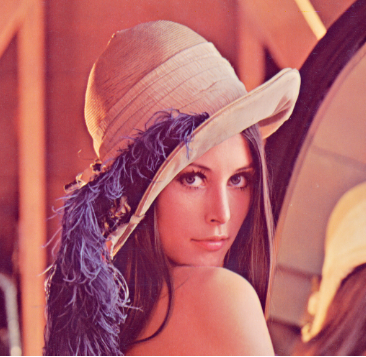

In [ ]:
picture

In [ ]:
print("Format",picture.format)
print("Mode:", picture.mode)
print("size",picture.size)

Format PNG
Mode: RGBA
size (366, 357)


In [ ]:
picture=picture.convert("RGB")
print("Mode",picture.mode)

Mode RGB


# 2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

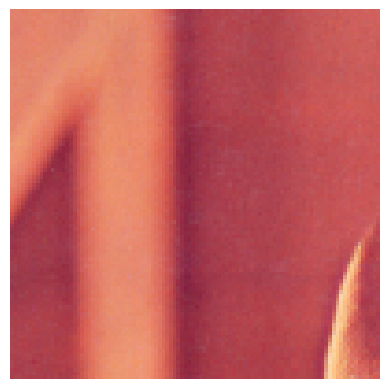

In [ ]:
#convert image into numpy array
import numpy as np
import matplotlib.pyplot as plt
picture_array=np.array(picture)


top_left_cornerp=picture_array[:100,:100]

plt.imshow(top_left_cornerp)
plt.axis('off')
plt.show()

# 3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

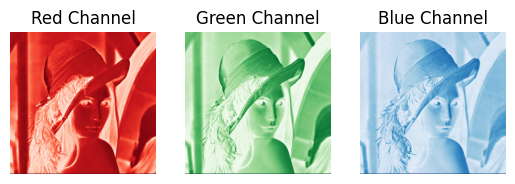

In [ ]:
red_channel=picture_array[:,:,0]
green_channel=picture_array[:,:,1]
blue_channel=picture_array[:,:,2]

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')  # Use 'Reds' colormap for red channel
plt.title('Red Channel')
plt.axis('off')

# Green Channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')  # Use 'Greens' colormap for green channel
plt.title('Green Channel')
plt.axis('off')

# Blue Channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')  # Use 'Blues' colormap for blue channel
plt.title('Blue Channel')
plt.axis('off')

plt.show()

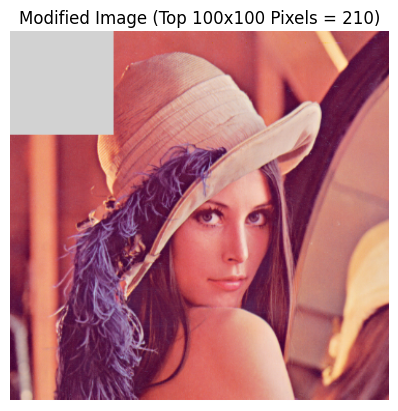

In [ ]:
# Step 2: Modify the top-left 100x100 region to have a value of 210
picture_array[:100, :100] = 210  # Set all channels (R, G, B) to 210 in the top-left 100x100 region

# Step 3: Display the modified image
plt.imshow(picture_array)
plt.axis('off')  # Hide axis
plt.title('Modified Image (Top 100x100 Pixels = 210)')
plt.show()

# 2.2 Exercise - 2:
Complete all the Task.
1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

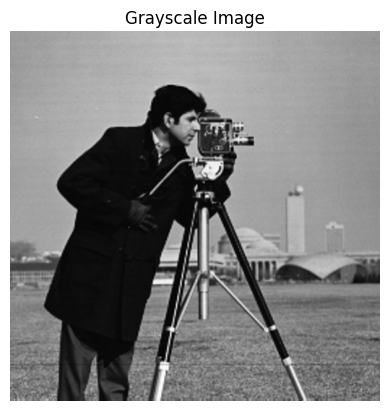

In [ ]:
image_gray=Image.open("/content/drive/MyDrive/AI and ML college 6 sem/cameraman.png")



# Step 3: Display the grayscale image using matplotlib
plt.imshow(image_gray, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

# 2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

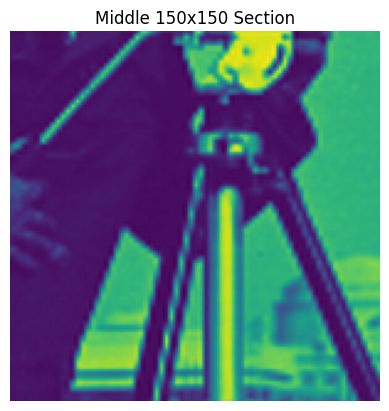

In [ ]:
gray_image_array=np.array(image_gray)
# Step 3: Calculate the starting and ending indices for the center 150x150 region
height, width = gray_image_array.shape[:2]  # Get the height and width of the image
start_x = (width // 2) - 75  # Starting x-coordinate (center - 75)
start_y = (height // 2) - 75  # Starting y-coordinate (center - 75)
end_x = start_x + 150  # Ending x-coordinate
end_y = start_y + 150  # Ending y-coordinate

# Step 4: Extract the middle 150x150 section using NumPy array slicing
middle_section = gray_image_array[start_y:end_y, start_x:end_x]

# Step 5: Display the cropped image using matplotlib
plt.imshow(middle_section)
plt.axis('off')  # Hide axis
plt.title('Middle 150x150 Section')
plt.show()

# 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

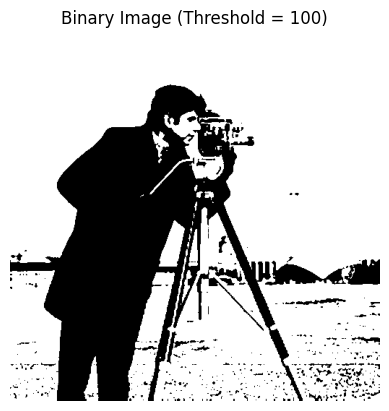

In [ ]:
import cv2

threshold_value = 100
binary_image = np.where(gray_image_array >= threshold_value, 255, 0)  # Set values >= 100 to 255, else 0

# Step 4: Display the binary image
plt.imshow(binary_image, cmap='gray')  # Use 'gray' colormap for binary images
plt.axis('off')
plt.title('Binary Image (Threshold = 100)')
plt.show()

# 4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

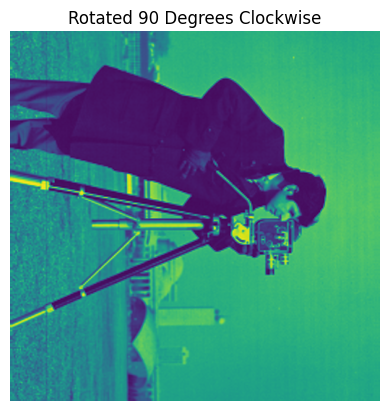

In [ ]:
rotate_image=image_gray.rotate(-90, expand=True)
plt.imshow(rotate_image)
plt.title("Rotated 90 Degrees Clockwise")
plt.axis("off")
plt.show()


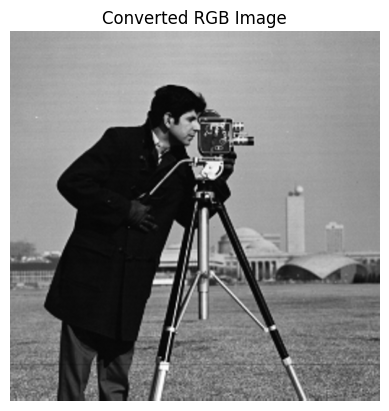

In [ ]:
rgb_array = np.stack([gray_image_array] * 3, axis=-1)

# Step 4: Display the converted RGB image
plt.imshow(rgb_array)
plt.axis('off')  # Hide axis
plt.title('Converted RGB Image')
plt.show()

# 3 Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

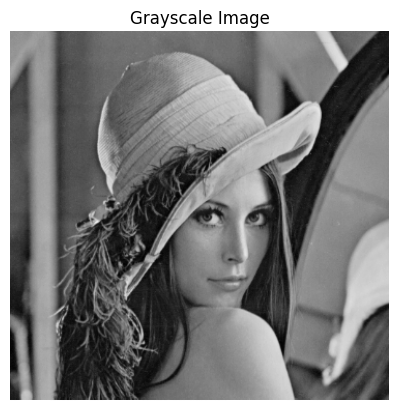

In [ ]:
# "Step 1: Fetch an Image"
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace 'your_image.jpg' with the path to your image)
image = cv2.imread('/content/drive/MyDrive/AI and ML college 6 sem/lenna_image.png')

# Convert to grayscale if it's a color image
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

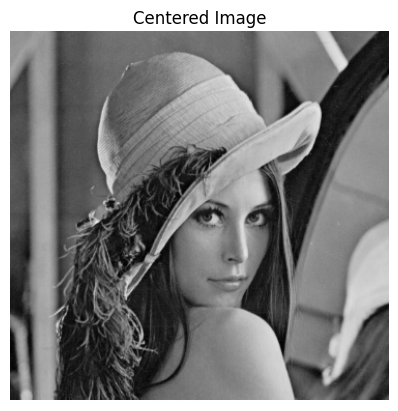

In [ ]:
# Flatten the image into a 1D array
flattened_image = image.flatten()

# Center the data by subtracting the mean
mean_value = np.mean(flattened_image)
centered_data = flattened_image - mean_value

# Reshape the centered data back to the original image shape (for visualization)
centered_image = centered_data.reshape(image.shape)

# Display the centered image
plt.imshow(centered_image, cmap='gray')
plt.title('Centered Image')
plt.axis('off')
plt.show()

In [ ]:
# Step 3: Calculate the Covariance Matrix
# Reshape the centered data into a 2D array (each row is a sample, each column is a feature)
# For an image, each pixel is a feature, so we reshape it to (num_pixels, 1)
data_matrix = image.reshape(-1, 1)

# Calculate the covariance matrix
covariance_matrix = np.cov(data_matrix, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
2347.7310811378093


In [ ]:
print(covariance_matrix.shape)


()


In [ ]:
covariance_matrix = np.cov(image, rowvar=False)


In [ ]:
covariance_matrix = np.array(covariance_matrix, ndmin=2)


In [ ]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Eigenvalues and eigenvectors are returned in ascending order, so we sort them in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 1.62336878e+05+0.00000000e+00j  1.06952408e+05+0.00000000e+00j
  6.44816007e+04+0.00000000e+00j  4.96919616e+04+0.00000000e+00j
  4.36774352e+04+0.00000000e+00j  3.12922874e+04+0.00000000e+00j
  3.01337428e+04+0.00000000e+00j  1.74500543e+04+0.00000000e+00j
  1.56482809e+04+0.00000000e+00j  1.27118987e+04+0.00000000e+00j
  9.87787440e+03+0.00000000e+00j  8.30459394e+03+0.00000000e+00j
  7.75350134e+03+0.00000000e+00j  7.16430638e+03+0.00000000e+00j
  6.35421846e+03+0.00000000e+00j  5.92244956e+03+0.00000000e+00j
  5.30162288e+03+0.00000000e+00j  4.75815320e+03+0.00000000e+00j
  4.21902505e+03+0.00000000e+00j  3.83435751e+03+0.00000000e+00j
  3.49128969e+03+0.00000000e+00j  3.24636237e+03+0.00000000e+00j
  2.86230696e+03+0.00000000e+00j  2.38263237e+03+0.00000000e+00j
  2.29211188e+03+0.00000000e+00j  2.22572896e+03+0.00000000e+00j
  1.96043853e+03+0.00000000e+00j  1.87907926e+03+0.00000000e+00j
  1.75848530e+03+0.00000000e+00j  1.67959367e+03+0.00000000e+00j
  1.47086791

In [ ]:
# Choose the top k eigenvectors (for example, k=1)
k = 1
top_k_eigenvectors = eigenvectors[:, :k]

print("Top k Eigenvectors:")
print(top_k_eigenvectors)

Top k Eigenvectors:
[[ 0.03798769+0.j]
 [ 0.03775167+0.j]
 [ 0.037324  +0.j]
 [ 0.03651679+0.j]
 [ 0.03716505+0.j]
 [ 0.03785337+0.j]
 [ 0.03861896+0.j]
 [ 0.04113757+0.j]
 [ 0.04349659+0.j]
 [ 0.04900406+0.j]
 [ 0.05415314+0.j]
 [ 0.05819712+0.j]
 [ 0.05484906+0.j]
 [ 0.05146782+0.j]
 [ 0.04880071+0.j]
 [ 0.04751533+0.j]
 [ 0.0493517 +0.j]
 [ 0.05002102+0.j]
 [ 0.04197708+0.j]
 [ 0.0267985 +0.j]
 [ 0.01358024+0.j]
 [ 0.00426602+0.j]
 [-0.00073504+0.j]
 [-0.00142186+0.j]
 [-0.00174972+0.j]
 [-0.00244544+0.j]
 [-0.00354874+0.j]
 [-0.00509432+0.j]
 [-0.00612649+0.j]
 [-0.00627192+0.j]
 [-0.00629799+0.j]
 [-0.00624057+0.j]
 [-0.00685188+0.j]
 [-0.00825821+0.j]
 [-0.00874223+0.j]
 [-0.0092544 +0.j]
 [-0.01124755+0.j]
 [-0.01282968+0.j]
 [-0.01363848+0.j]
 [-0.01339749+0.j]
 [-0.01376773+0.j]
 [-0.01363952+0.j]
 [-0.01577994+0.j]
 [-0.01825209+0.j]
 [-0.01924681+0.j]
 [-0.01756807+0.j]
 [-0.00779995+0.j]
 [-0.00045024+0.j]
 [-0.0008931 +0.j]
 [-0.00355216+0.j]
 [-0.00626701+0.j]
 [-0.009840

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


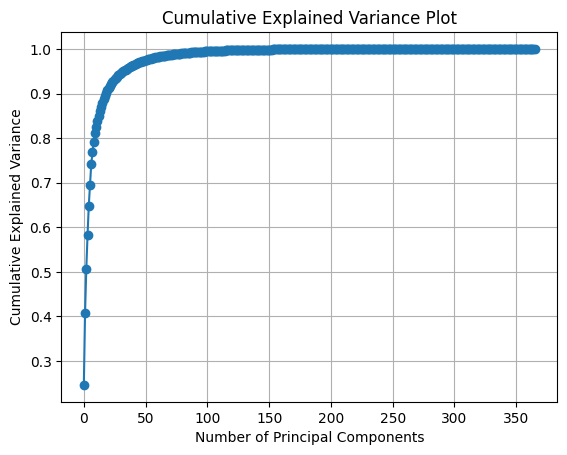

In [ ]:
# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()